# Koch's snowflake

In [1]:
import numpy as np
import sympy as sy

import src

In [2]:
def snowflake() -> src.SelfAffineSet:
    """Return the Koch's snowflake."""

    S0 = src.contractive_similarity(
        sy.sqrt(3) / 3, src.rotation_matrix_2d(sy.pi / 6), sy.Matrix([[0], [0]])
    )

    factor = sy.Rational(1, 3)
    ifs = [
        S0,
        *[
            src.contractive_similarity(factor, sy.eye(2), sy.Matrix(p))
            for p in [(sy.cos(t * sy.pi / 3), sy.sin(t * sy.pi / 3)) for t in range(6)]
        ],
    ]

    measures = [sy.Rational(1, 3), *[sy.Rational(1, 9) for _ in range(6)]]

    return src.SelfAffineSet(ifs, measures, 2)

In [3]:
attractor = snowflake()

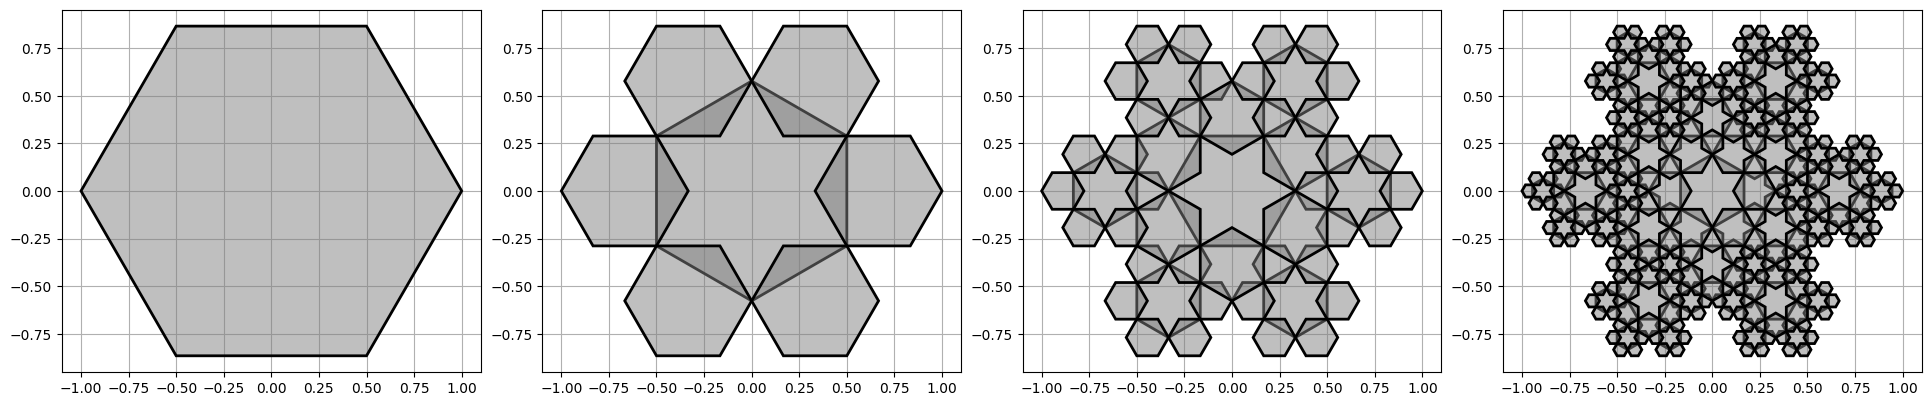

In [4]:
src.render_pre_attractor(
    attractor,
    np.array(
        [
            [np.cos(t * np.pi / 3) for t in range(6)],
            [np.sin(t * np.pi / 3) for t in range(6)],
        ]
    ),
    3,
)

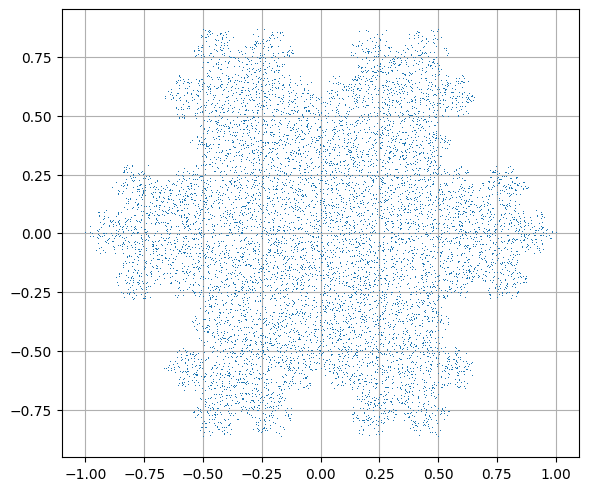

In [5]:
src.render_chaos_game(attractor, 10_000)

In [6]:
tot_deg_max = 4

values = src.compute_polynomial_integral(attractor, tot_deg_max)

src.display_values(values, attractor.space_dim, variables=sy.symbols("x y", real=True))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [7]:
# src.export_to_file(values, attractor, "d2-snowflake")